In [1]:
from intelligent_placer_lib.preproccesing import load_images
from intelligent_placer_lib.preproccesing import get_contours
from intelligent_placer_lib.placer import place_objects
from intelligent_placer_lib.spliter import split_contours
from matplotlib import pyplot as plt
from shapely.geometry import Polygon

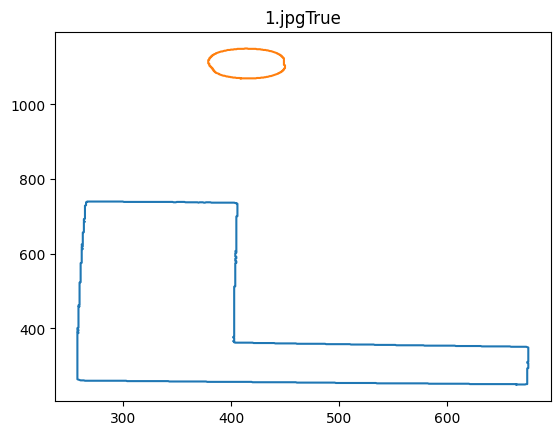

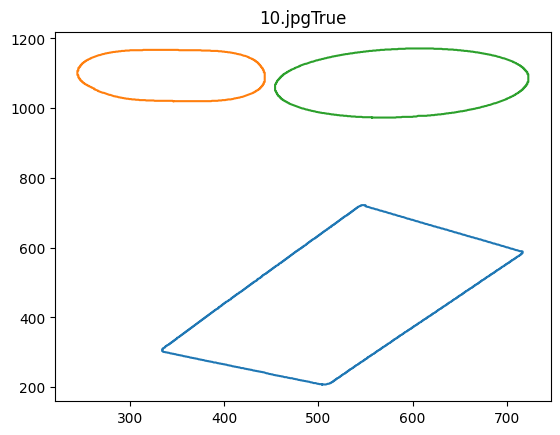

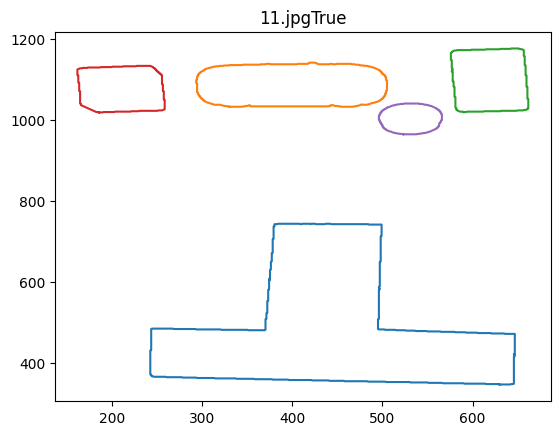

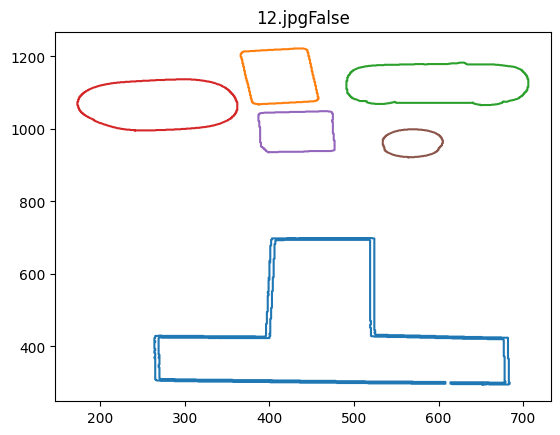

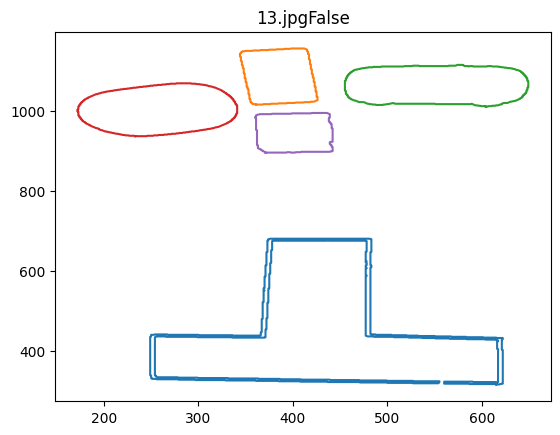

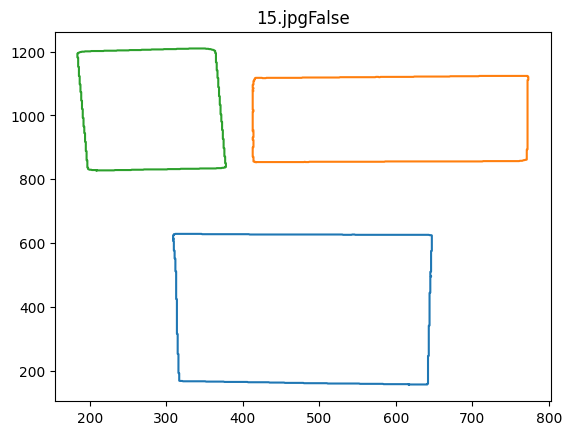

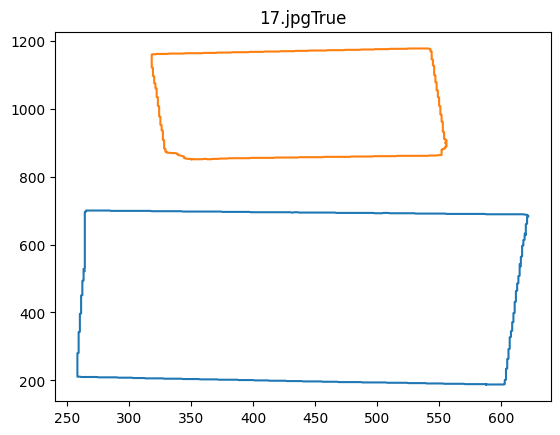

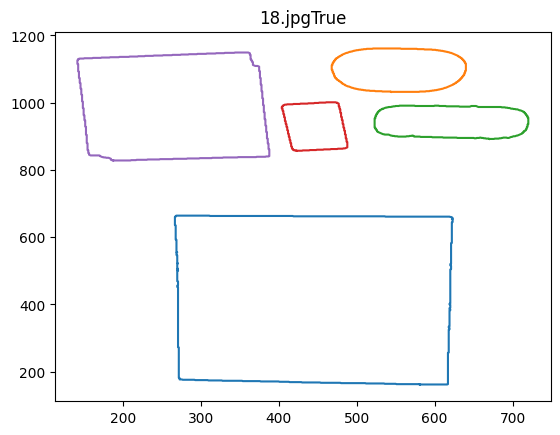

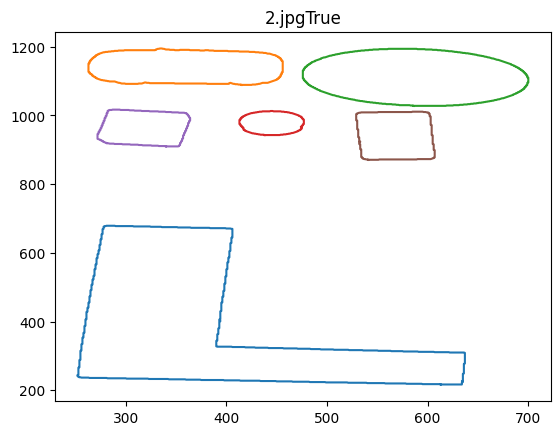

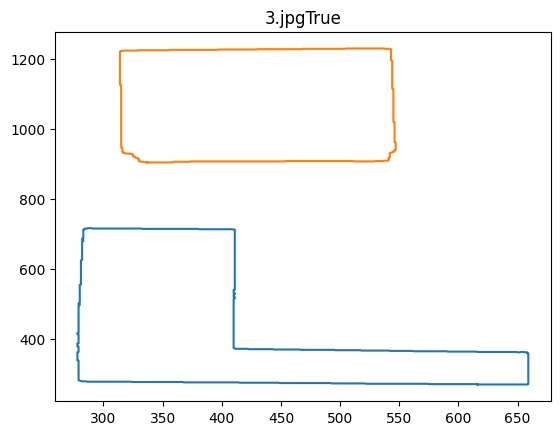

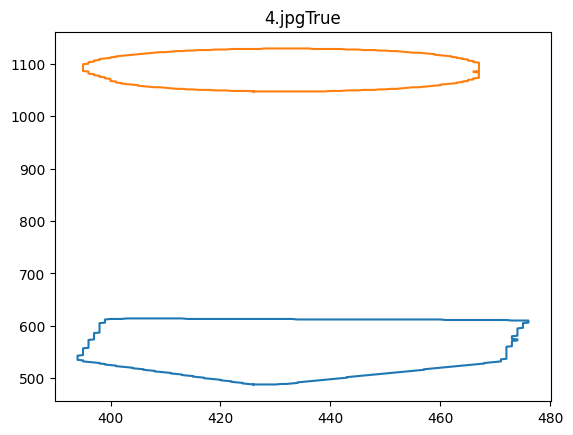

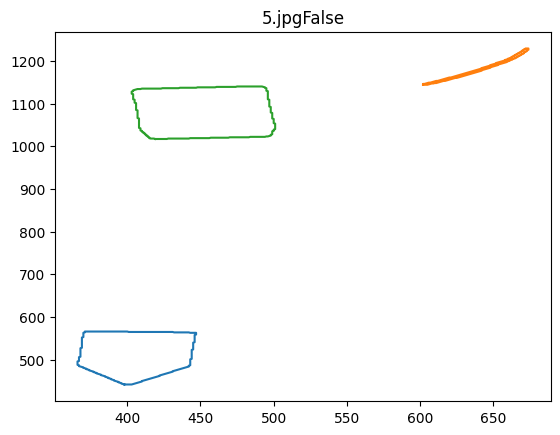

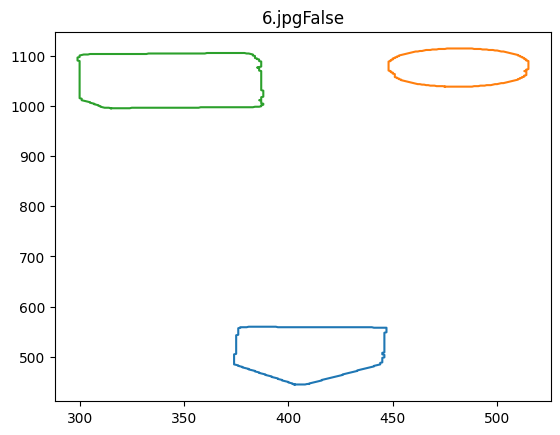

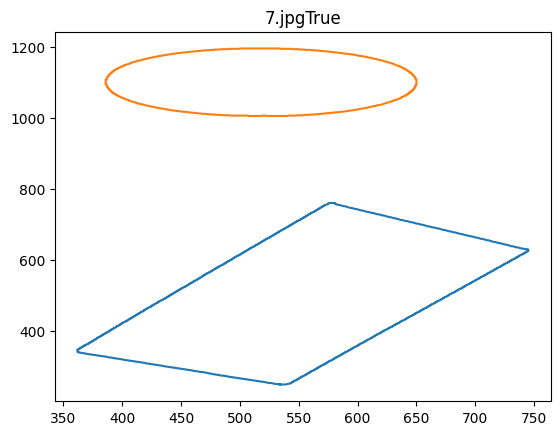

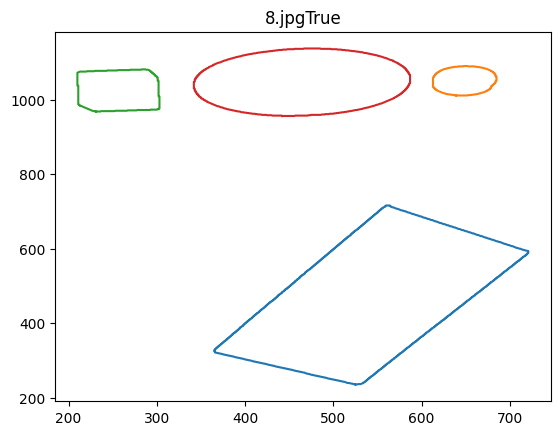

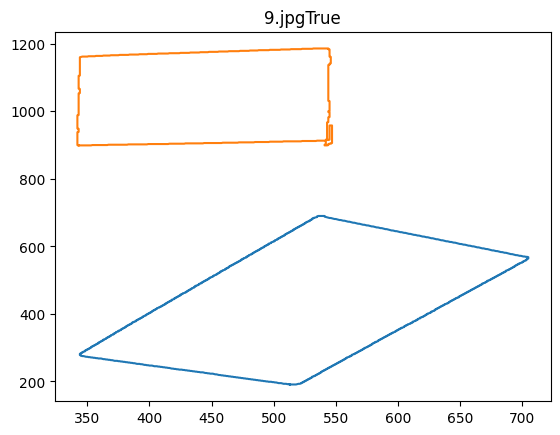

In [2]:
#не самый приятный код хахпах, к финальной версии все будет ок)
#polygon нужен для дальнейших операций, чтобы удобно было вырезать контуры обьектов из фигуры

images, name = load_images("images/tests")
i=1
for im in images:
    plt.figure(i)
    
    
    
    cnts = get_contours(im)
    poly, objects = split_contours(cnts)
    

    p1 = [tuple(p) for p in poly[:, 0]]
    pol = Polygon(p1)
    
    plt.plot(*pol.exterior.xy)
   
    objs = []
    for o in objects:
        o1 = [tuple(p) for p in o[:, 0]]
        obj = Polygon(o1)
        objs.append(obj)
  
        plt.plot(*obj.exterior.xy)
    res = place_objects(pol, objs)
    plt.title(name[i-1] + str(res))
    i+=1
  